#Brief description of the dataset

I am going to work with two datasets and combine them:

- Total amount of power generated through time by energy type.
- Price of power.

First we are going to load the necessary modules for this program to work:

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Then, we will load the datasets that we have produced from our JS application. I need to combine different years of data:

In [2]:
years = ['2017', '2018', '2019', '2020', '2021']

EnergyGeneration_All = pd.io.json.read_json('./energy_generation_type_date2016.json')
for x in years:
    pathEnergy = './energy_generation_type_date' + x + '.json'
    newDF = pd.io.json.read_json(pathEnergy).round()
    EnergyGeneration_All = EnergyGeneration_All.append(newDF)

EnergyGeneration_All


,Hidráulica,Turbinación bombeo,Nuclear,Carbón,Fuel + Gas,Motores diésel,Turbina de gas,Turbina de vapor,Ciclo combinado,Hidroeólica,Eólica,Solar fotovoltaica,Solar térmica,Otras renovables,Cogeneración,Residuos no renovables,Residuos renovables,Generación total
2016-01-01,31642.298,9886.914,169843.416,30064.305,NaN,8304.632,1501.270,6071.229,61174.055,11.714,202916.119,9021.566,695.552,7543.142,44030.379,4525.3350,1754.8050,588986.731
2016-01-02,35554.520,24261.468,169614.296,32070.636,NaN,8635.330,1718.746,7339.712,56294.848,13.572,235804.590,12635.816,1260.093,7876.332,53249.260,4571.3020,1613.1100,652513.631
2016-01-03,35920.392,12502.102,164994.879,27063.031,NaN,8490.337,1616.735,6738.157,51333.835,20.916,311377.459,5096.597,95.938,7565.244,55824.967,5568.9755,1662.9085,695872.473
2016-01-04,65278.775,30484.420,145859.298,41511.320,NaN,8897.895,2242.070,7886.107,59893.786,28.387,258510.870,4849.798,69.916,7953.584,64904.942,5928.2040,2133.3190,706432.691
2016-01-05,79728.796,20729.332,146050.955,43830.176,NaN,8740.527,2086.604,7909.799,50045.608,33.797,290893.912,12562.126,1432.872,7944.637,66781.178,6287.7865,2474.5605,747532.666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-12,41847.000,7652.000,119416.000,19585.000,NaN,7113.000,677.000,3623.000,304183.000,41.000,87048.000,48765.000,8161.000,14025.000,77054.000,6077.0000,2846.0000,748114.000
2021-11-13,28461.000,1921.000,119204.000,19499.000,NaN,7162.000,579.000,3727.000,201214.000,25.000,127559.000,50885.000,9218.000,14362.000,72555.000,5882.0000,2780.0000,665034.000
2021-11-14,27153.000,1401.000,119008.000,19174.000,NaN,6949.000,412.000,3434.000,128111.000,14.000,221044.000,55100.000,9539.000,15024.000,69138.000,5834.0000,2784.0000,684119.000
2021-11-15,34820.000,5511.000,118811.000,19412.000,NaN,7341.000,813.000,3282.000,172103.000,6.000,270822.000,53224.000,8679.000,15879.000,73203.000,5757.0000,2618.0000,792280.000


On the other hand we will now import the prices of energy, also on a daily basis.

In [3]:

pathPrices = './prices.csv'

historyPrice = pd.read_csv(pathPrices, decimal=',')

historyPrice

,Fecha,Precio
0,16/9/2021,188.18
1,15/9/2021,172.78
2,14/9/2021,153.43
3,13/9/2021,154.16
4,12/9/2021,144.18
...,...,...
8655,5/1/1998,25.96
8656,4/1/1998,23.19
8657,3/1/1998,19.59
8658,2/1/1998,22.44


In this case we can see that the dates are in European form, in fact they're not even interpreted as dates. Let's convert them and set them as index, so that it looks the same as the other df:

In [4]:
historyPrice['Fecha'] = pd.to_datetime(historyPrice['Fecha'], format='%d/%m/%Y')
historyPrice.set_index('Fecha', inplace=True)
historyPrice

,Precio
Fecha,
2021-09-16,188.18
2021-09-15,172.78
2021-09-14,153.43
2021-09-13,154.16
2021-09-12,144.18
...,...
1998-01-05,25.96
1998-01-04,23.19
1998-01-03,19.59


Now we are ready to merge this data by using the dates as an index.
This will yield only as a result the rows where the date is present for both dataframes.

In [5]:
PriceEnergy = historyPrice.merge(EnergyGeneration_All, left_on='Fecha', right_index=True)
PriceEnergy 


,Precio,Hidráulica,Turbinación bombeo,Nuclear,Carbón,Fuel + Gas,Motores diésel,Turbina de gas,Turbina de vapor,Ciclo combinado,Hidroeólica,Eólica,Solar fotovoltaica,Solar térmica,Otras renovables,Cogeneración,Residuos no renovables,Residuos renovables,Generación total
Fecha,,,,,,,,,,,,,,,,,,,
2021-09-16,188.18,43424.000,1260.000,164798.000,19127.000,NaN,8531.000,3168.000,3474.000,204748.000,58.000,86351.000,68316.000,15052.000,13918.000,74553.000,5532.0000,2235.0000,714545.000
2021-09-15,172.78,60257.000,1530.000,164806.000,19132.000,NaN,9300.000,4057.000,3904.000,293778.000,36.000,46236.000,54345.000,5075.000,13589.000,72299.000,6064.0000,2207.0000,756615.000
2021-09-14,153.43,58554.000,4933.000,165172.000,17431.000,NaN,9543.000,4124.000,4602.000,245864.000,16.000,118235.000,22580.000,276.000,13569.000,70874.000,6182.0000,2194.0000,744145.000
2021-09-13,154.16,45402.000,738.000,160803.000,11924.000,NaN,9347.000,4016.000,4610.000,199502.000,NaN,153187.000,25231.000,300.000,13210.000,70979.000,6732.0000,2749.0000,708731.000
2021-09-12,144.18,52642.000,3918.000,147918.000,11898.000,0.0,9292.000,1690.000,4295.000,150372.000,10.000,47319.000,75099.000,17774.000,13445.000,68290.000,6885.0000,2875.0000,613721.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-05,31.77,79728.796,20729.332,146050.955,43830.176,NaN,8740.527,2086.604,7909.799,50045.608,33.797,290893.912,12562.126,1432.872,7944.637,66781.178,6287.7865,2474.5605,747532.666
2016-01-04,30.46,65278.775,30484.420,145859.298,41511.320,NaN,8897.895,2242.070,7886.107,59893.786,28.387,258510.870,4849.798,69.916,7953.584,64904.942,5928.2040,2133.3190,706432.691
2016-01-03,18.48,35920.392,12502.102,164994.879,27063.031,NaN,8490.337,1616.735,6738.157,51333.835,20.916,311377.459,5096.597,95.938,7565.244,55824.967,5568.9755,1662.9085,695872.473


#Initial plan for data exploration

In our datasets we have basically three variables: price, type of energy, and amount of energy. 
My idea is to use scatter charts, and histograms in order to have a first visual idea of the relation between these variables.

#Actions taken for data cleaning

Now that we have both dataframes merged, we can check if everything is correct.
1) In principle, there should be no NaN values. Here we get one column (Fuel + Gas, #4) with most of values NaN so we will discard it.

In [6]:
PriceEnergy.info()
PriceEnergy.drop(columns='Fuel + Gas', inplace=True)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2080 entries, 2021-09-16 to 2016-01-01
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Precio                  2080 non-null   float64
 1   Hidráulica              2080 non-null   float64
 2   Turbinación bombeo      2080 non-null   float64
 3   Nuclear                 2080 non-null   float64
 4   Carbón                  2080 non-null   float64
 5   Fuel + Gas              34 non-null     float64
 6   Motores diésel          2080 non-null   float64
 7   Turbina de gas          2080 non-null   float64
 8   Turbina de vapor        2080 non-null   float64
 9   Ciclo combinado         2080 non-null   float64
 10  Hidroeólica             2079 non-null   float64
 11  Eólica                  2080 non-null   float64
 12  Solar fotovoltaica      2080 non-null   float64
 13  Solar térmica           2075 non-null   float64
 14  Otras renovables      

Now, there should be no negative values. From describe() we get some rows where the minimum is negative. 
The only place where this is relevant is in column Carbón (Coal), although the value is quite little  we will replace all those values with '0'.

In [7]:
PriceEnergy.describe()
EnergyGeneration_All.loc[(EnergyGeneration_All['Carbón'] < 0)] = 0

Moreover, the maximum of each column must be lower than maximum of Total Generation. 
Here is can be seen that the maximum generation is 943229, which should be higher than the maximum of the rest of values for any given day. Which is true.


In [8]:
PriceEnergy.max()

Precio                       188.180
Hidráulica                212677.595
Turbinación bombeo         30484.420
Nuclear                   171364.778
Carbón                    203589.000
Motores diésel             12026.000
Turbina de gas              5220.000
Turbina de vapor            9406.000
Ciclo combinado           326813.000
Hidroeólica                  151.000
Eólica                    414556.000
Solar fotovoltaica         92220.000
Solar térmica              33388.129
Otras renovables           15397.000
Cogeneración               92024.000
Residuos no renovables      8820.699
Residuos renovables         3042.000
Generación total          943230.000
dtype: float64

#Exploratory data analysis

I am going to draw several plots in order to understand the data that we have.

If we plot the total generated energy as a whole, I realise that there is a lot of noise around this indicator, so I am going to work with a moving average of 14 days.
In the illustration below it can be seen the real value vs the moving average. Note that the real values have such a high fluctuation, that it is even hard to tell the value of the function.

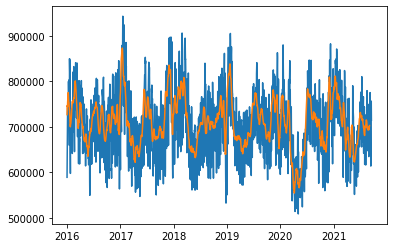

In [9]:
PriceEnergy['Average'] = pd.Series.rolling(PriceEnergy['Generación total'], 14).mean().round()
PriceEnergy

fig, ax = plt.subplots()

ax.plot(PriceEnergy['Generación total'])
ax.plot(PriceEnergy['Average'])

plt.show()

From the plot above it is not easy to tell if there has been major changes in energy consumption in Spain.
We will stack the series by eliminating the year in order to analyze this in a more visual manner.

In [11]:
generationHistory = pd.DataFrame(PriceEnergy['Average'])

generationHistory['año'] = generationHistory.index.to_series().dt.year
generationHistory['fecha'] = generationHistory.index.to_series().dt.strftime('%m-%d')
generationHistory.set_index(['año', 'fecha'], inplace=True)
generationHistory = generationHistory.unstack(level=0)
#generationHistory['avg_16_20'] = df.loc[2017:]

older_years = generationHistory['Average'].loc[:, '2016':'2020'].mean(axis=1)
older_years


fecha
01-01    736173.8
01-02    750417.4
01-03    757965.0
01-04    762831.8
01-05    768162.6
           ...   
12-26    708135.0
12-27    720300.8
12-28    728209.2
12-29    732580.0
12-30    729843.5
Length: 365, dtype: float64

Now we are ready to plot it.

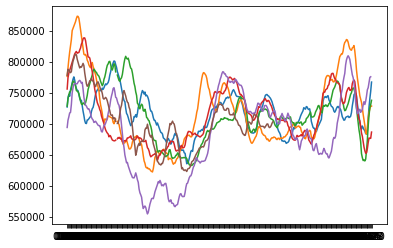

In [13]:
plt.plot(generationHistory)
plt.show()

Another column we may use is the amount of energy that is renewable vs non renewable:

In [14]:
PriceEnergy['Renovable'] = PriceEnergy['Hidráulica'] + PriceEnergy['Hidroeólica'] + PriceEnergy['Eólica'] + PriceEnergy['Solar fotovoltaica'] + PriceEnergy['Solar térmica'] + PriceEnergy['Otras renovables'] + PriceEnergy['Residuos renovables']

PriceEnergy['No renovable'] = PriceEnergy['Generación total'] - PriceEnergy['Renovable'] 

PriceEnergy['Renovable_media'] = pd.Series.rolling(PriceEnergy['Renovable'], 14).mean().round()
PriceEnergy.to_csv('out.csv')
PriceEnergy

,Precio,Hidráulica,Turbinación bombeo,Nuclear,Carbón,Motores diésel,Turbina de gas,Turbina de vapor,Ciclo combinado,Hidroeólica,...,Solar térmica,Otras renovables,Cogeneración,Residuos no renovables,Residuos renovables,Generación total,Average,Renovable,No renovable,Renovable_media
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-09-16,188.18,43424.000,1260.000,164798.000,19127.000,8531.000,3168.000,3474.000,204748.000,58.000,...,15052.000,13918.000,74553.000,5532.0000,2235.0000,714545.000,NaN,229354.0000,485191.0000,NaN
2021-09-15,172.78,60257.000,1530.000,164806.000,19132.000,9300.000,4057.000,3904.000,293778.000,36.000,...,5075.000,13589.000,72299.000,6064.0000,2207.0000,756615.000,NaN,181745.0000,574870.0000,NaN
2021-09-14,153.43,58554.000,4933.000,165172.000,17431.000,9543.000,4124.000,4602.000,245864.000,16.000,...,276.000,13569.000,70874.000,6182.0000,2194.0000,744145.000,NaN,215424.0000,528721.0000,NaN
2021-09-13,154.16,45402.000,738.000,160803.000,11924.000,9347.000,4016.000,4610.000,199502.000,NaN,...,300.000,13210.000,70979.000,6732.0000,2749.0000,708731.000,NaN,NaN,NaN,NaN
2021-09-12,144.18,52642.000,3918.000,147918.000,11898.000,9292.000,1690.000,4295.000,150372.000,10.000,...,17774.000,13445.000,68290.000,6885.0000,2875.0000,613721.000,NaN,209164.0000,404557.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-05,31.77,79728.796,20729.332,146050.955,43830.176,8740.527,2086.604,7909.799,50045.608,33.797,...,1432.872,7944.637,66781.178,6287.7865,2474.5605,747532.666,754459.0,395070.7005,352461.9655,386840.0
2016-01-04,30.46,65278.775,30484.420,145859.298,41511.320,8897.895,2242.070,7886.107,59893.786,28.387,...,69.916,7953.584,64904.942,5928.2040,2133.3190,706432.691,744212.0,338824.6490,367608.0420,382184.0
2016-01-03,18.48,35920.392,12502.102,164994.879,27063.031,8490.337,1616.735,6738.157,51333.835,20.916,...,95.938,7565.244,55824.967,5568.9755,1662.9085,695872.473,746821.0,361739.4545,334133.0185,386886.0


Now I would like to have a look at the data combined.

After several rounds of testing, I have decided to define a function so that we can draw multiple plots quickly. The function will show:

- The distribution of the column that I am analyzing (in the first attempt, the Total Generation)
- Price and Energy vs Date.
- Scatter of Price vs Energy. 

When we plot the data (price and energy) of all 5 years, it turns out that the distribution "looks pretty normal". 
But at first it is hard to tell any correlation between them. In fact, by late 2021 we see that energy remains constant while price skyrockets. In fact we get a Pearson correlation of 0.12.

C:\Users\Usuario\AppData\Local\Temp/ipykernel_8684/2986396238.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  PriceEnergy_select = PriceEnergy.loc[dateFrom:dateTo]
C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


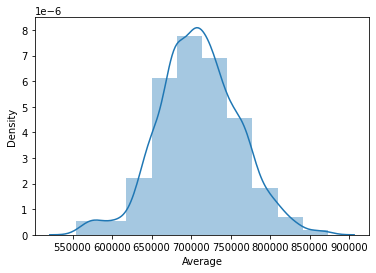

C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


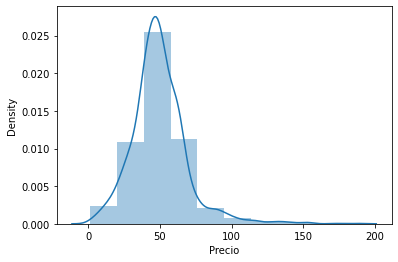

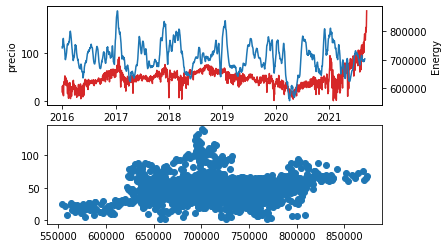

Correlación Pearson:  0.12786991778759346


In [82]:
def plot_PriceEnergy_Energyhist(myCol, dateFrom, dateTo):
    PriceEnergy_select = PriceEnergy.loc[dateFrom:dateTo]
    
    #First plot: Energy histogram (to answer the question, is it normal distribution?)
    sns.distplot(PriceEnergy_select[myCol], bins=10)
    plt.show()
    
    sns.distplot(PriceEnergy_select['Precio'], bins=10)
    plt.show()
    fig, axs = plt.subplots(2)

    #Second plot: Price and energy generation vs. Date
    color = 'tab:red' 
    axs[0].set_xlabel('Date')
    axs[0].set_ylabel('precio')
    axs[0].plot(PriceEnergy_select['Precio'], color=color)

    axs0_right = axs[0].twinx()
    axs0_right.set_ylabel('Energy')
    axs0_right.plot(PriceEnergy_select[myCol])

    #Third plot: 
    axs[1].scatter(PriceEnergy_select[myCol], PriceEnergy_select['Precio'])
    plt.show()

    
    
    print("Correlación Pearson: ", PriceEnergy_select['Precio'].corr(PriceEnergy_select[myCol], method='spearman'))
   

plot_PriceEnergy_Energyhist('Average', '2016-01-01', '2021-12-31')

But what happens when we limit the amount of data analyzed to the last year:

C:\Users\Usuario\AppData\Local\Temp/ipykernel_8684/2986396238.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  PriceEnergy_select = PriceEnergy.loc[dateFrom:dateTo]
C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


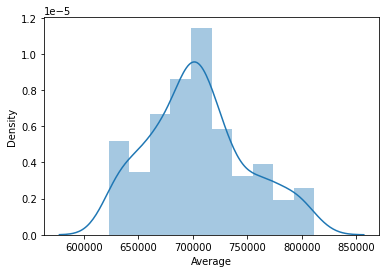

C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


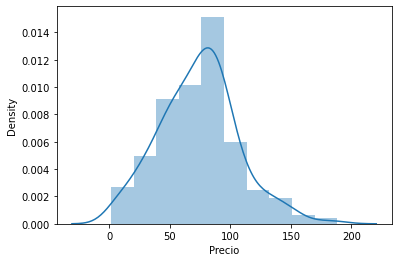

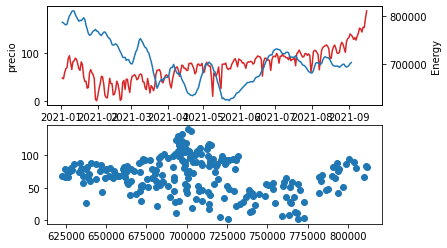

Correlación Pearson:  -0.18082757559889215


In [87]:
plot_PriceEnergy_Energyhist('Average', '2021-01-01', '2021-12-31')

Again it does not look too promising.
Now let's focus at another hypothesis: more expensive energies need to come into play because the renewable energies (the cheapest of all) can't cope with demand.
Consequently, if we limit the analysis to renewables, we should see a negative correlation of some sort.

C:\Users\Usuario\AppData\Local\Temp/ipykernel_8684/2986396238.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  PriceEnergy_select = PriceEnergy.loc[dateFrom:dateTo]
C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


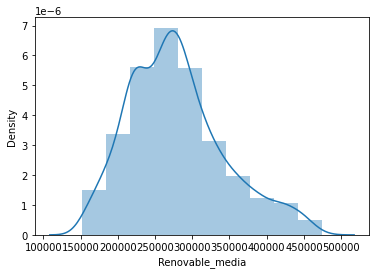

C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


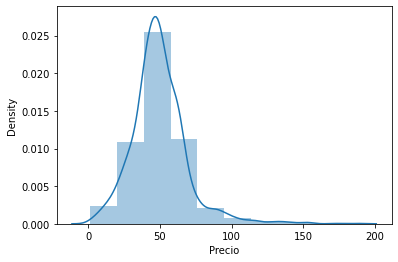

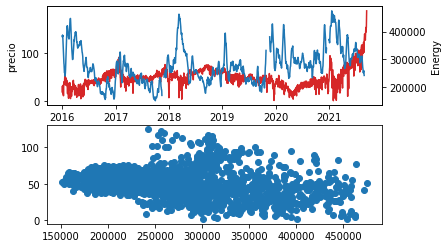

Correlación Pearson:  -0.2936048237950648


In [90]:
plot_PriceEnergy_Energyhist('Renovable_media', '2016-01-01', '2021-12-31')

If we pay close attention to the plot, for example zooming into (2016-01-01 until 2017-07-31) we could tell some correspondence between the renewable energy increasing and the price decreasing.
If we assume a normal distribution, the linear coefficient raises to -0.62.

This suggests that there is a correlation between the renewable energy that is generated and the price.  

C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


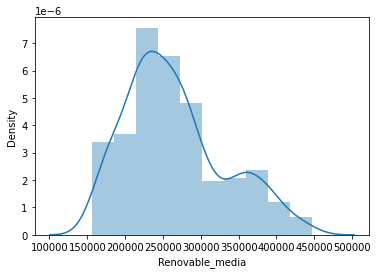

C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


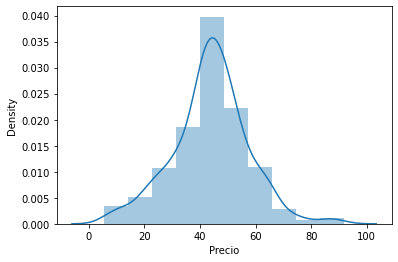

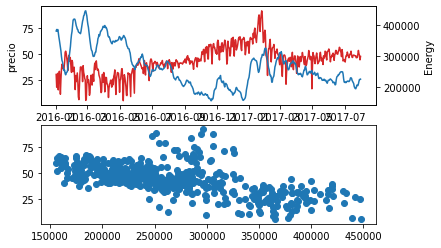

Correlación Pearson:  -0.6285215139417725


In [91]:
plot_PriceEnergy_Energyhist('Renovable_media', '2016-01-01', '2017-07-31')

Moreover, the fact that by reducing the time frame this is more evident, suggests that we shouldn't compare data from different years, because there may be other macroeconomic factors out of our control affecting the price. Therefore, we will do the analysis separately  will focus the analysis in the Renewable energy but in separate years.

By executing the function separately for each year, we get the following Pearson's coefficients:
- 2016: -.823
- 2017: -.011
- 2018: -.795
- 2019: +.11
- 2020: .074
- 2021: -.63

As we can see, it is rather variable. Some years show a strong correlation, while others a weak one. This suggests that the wind blowing less has some influence, but it is not the only one in a complex process such as the energy price setting.




C:\Users\Usuario\AppData\Local\Temp/ipykernel_8684/2986396238.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  PriceEnergy_select = PriceEnergy.loc[dateFrom:dateTo]
C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


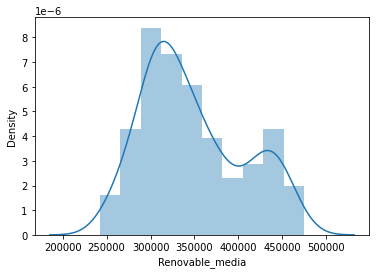

C:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


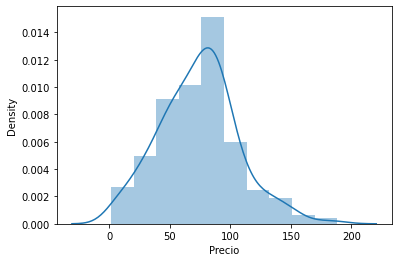

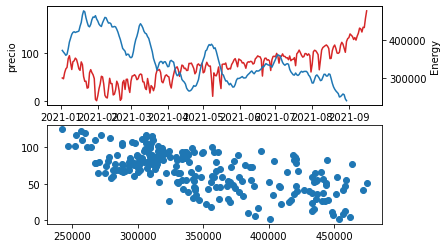

Correlación Pearson:  -0.6262592273324652


In [99]:
plot_PriceEnergy_Energyhist('Renovable_media', '2021-01-01', '2021-12-31')

#Key findings and insights

There seems to be some degree of inverse correlation between the power of renewable energies generated at a given day, and the price of those energies.
This makes sense, because renewable energies are cheap to produce. However they are unstable. Wind does not blow whenever we want. So when this happens, other less cheap energies come into play.
Such correlation is sometimes stronger, sometimes weaker, because there are other factors that need to be taken into account (such as CO2 rights).

Based on these findings, I would suggest to assess the Cost / Benefit of installing more renewable energy plants. The question would be, whether the taxpayer money invested in more windmills would compensate for the reduced energy bill.
With the caution that there may be other factors coming into place.

#Formal significance test

Hypothesis: the energy prices have gone this year up until 150 EUR. We would be interested in knowing if this is going to be a long-term trend (H0) or if it is going to be a short-term variation (H1).
For this we choose a p-value of 0.05. Meaning that if at least 5% of the daily prices is above 150 EUR, then we can accept this is a permanent trend.

From the CDF for prices calculated above, the probability of the price going above 150 EUR, this year, is of 6 days out of 259 days, that is 0.023%.
As this result is below the p-level, then we must reject the null hypothesis and conclude that this is a short term trend.

#Conclusions

At this point, it can be said that the price of energy shows a correlation which has been dominant over the past few years, although this is not the only one.
It can be said with an X percent confidence that an increase of renewable power in the country can lead to a decrease in Y euros in the MWh.

However there are other possible factors intervening in th
In order to be able to analyze them, we would need additional data: CO2 markets.